In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Fonte https://www.geeksforgeeks.org/visualize-graphs-in-python/
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

In [2]:
listaAdj = {}
listaAdj = {
            'Arad': {'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118},
            'Zerind': {'Arad': 75, 'Oradea': 71},
            'Oradea': {'Zerind': 71, 'Sibiu': 151},
            'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},\
            'Timisoara': {'Arad': 118, 'Lugoj': 111},
            'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
            'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
            'Dobreta': {'Mehadia': 75, 'Craiova': 120},
            'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
            'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
            'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
            'Pitesti': {'Rimnicu': 97, 'Craiova': 138, 'Bucharest': 101},
            'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
            'Giurgiu': {'Bucharest': 90},
            'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},
            'Hirsova': {'Urziceni': 98, 'Eforie': 86},
            'Eforie': {'Hirsova': 86},
            'Vaslui': {'Iasi': 92, 'Urziceni': 142},
            'Iasi': {'Vaslui': 92, 'Neamt': 87},
            'Neamt': {'Iasi': 87}
        }


In [ ]:
listaAdj['Arad']['Timisoara']

118

In [3]:
heuristics = {'Arad':366, 
              'Bucharest':0,
              'Craiova':160,
              'Dobreta': 242,
              'Eforie': 161,
              'Fagaras': 178,
              'Giurgiu': 77,
              'Hirsova': 151,
              'Iasi': 226,
              'Lugoj': 244,
              'Mehadia': 241,
              'Neamt': 234,
              'Oradea': 380,
              'Pitesti': 98,
              'Rimnicu': 193,
              'Sibiu': 253,
              'Timisoara': 329,
              'Urziceni': 80,
              'Vaslui': 199,
              'Zerind': 374
}

In [4]:
from queue import PriorityQueue

In [5]:
def a_star(source, destination, graph):
         
    priority_queue, border = PriorityQueue(), {}   
    priority_queue.put((heuristics[source], 0, source, [source]))
    border[source] = heuristics[source]
    while not priority_queue.empty():
        # Get current heuristic, cost and path generated so far! 
        (heuristic, cost, city, path) = priority_queue.get()
        print("Origem: ",city, " Destino: ", destination, " Caminho: ", path)        
        if city == destination:
            return heuristic, cost, path
        
        #Visit all adjacent cities from current vertex    
        for next_city in listaAdj[city].keys():          
            graph.addEdge(city, next_city)
            graph.visualize()
            # It Calculates estimated cost (from city to next_city)            
            current_cost = cost + listaAdj[city][next_city]
            # It Calculates estimated heuristic (from city to next_city)            
            heuristic = current_cost + heuristics[next_city]
            #print(next_city)
            #print(heuristic)              
            if not next_city in border or border[next_city] >= heuristic:                                                            
                border[next_city] = heuristic
                print(border)
                priority_queue.put((heuristic, current_cost, next_city, path + [next_city]))            


A Estrela:
Origem:  Arad  Destino:  Bucharest  Caminho:  ['Arad']


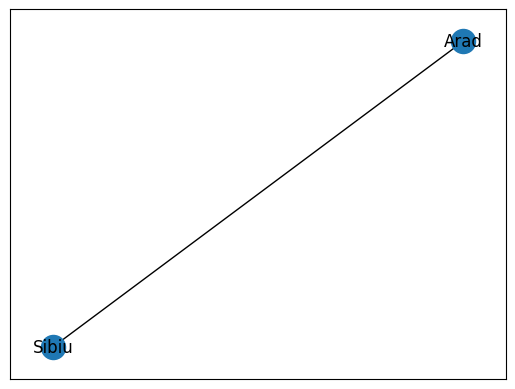

{'Arad': 366, 'Sibiu': 393}


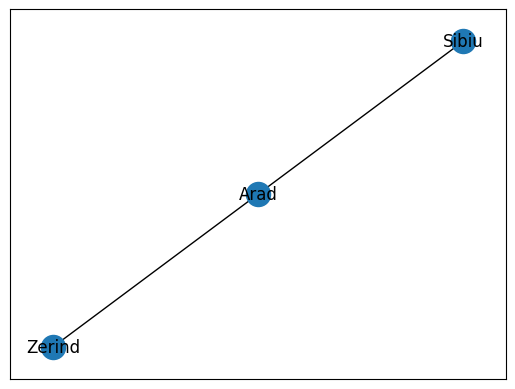

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449}


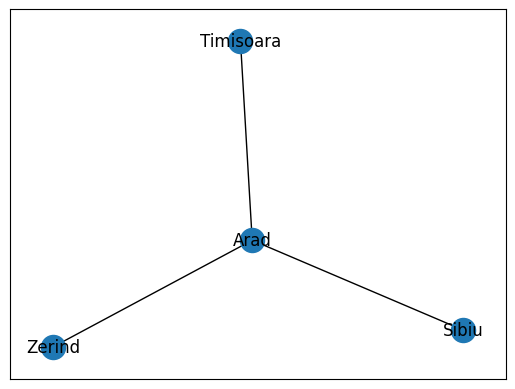

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447}
Origem:  Sibiu  Destino:  Bucharest  Caminho:  ['Arad', 'Sibiu']


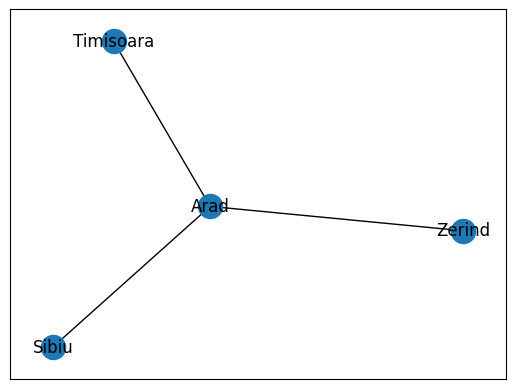

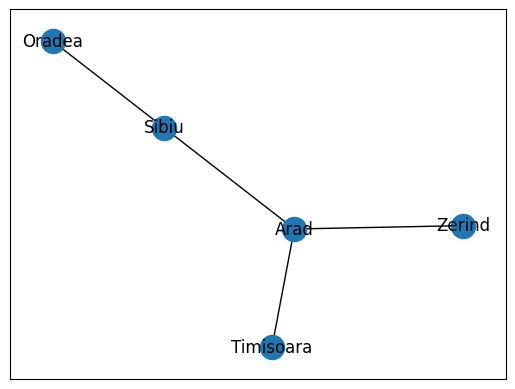

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447, 'Oradea': 671}


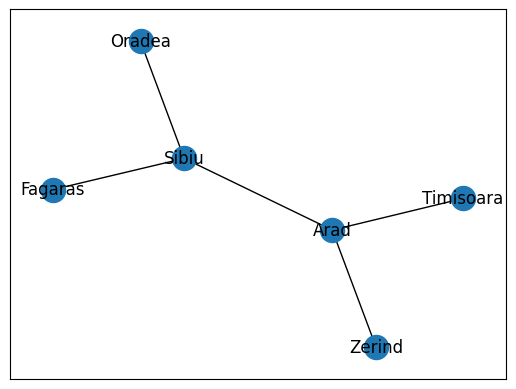

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447, 'Oradea': 671, 'Fagaras': 417}


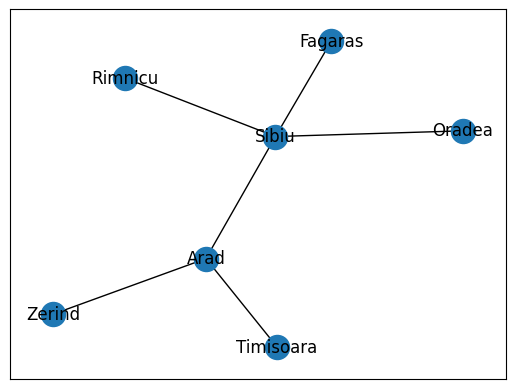

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447, 'Oradea': 671, 'Fagaras': 417, 'Rimnicu': 413}
Origem:  Rimnicu  Destino:  Bucharest  Caminho:  ['Arad', 'Sibiu', 'Rimnicu']


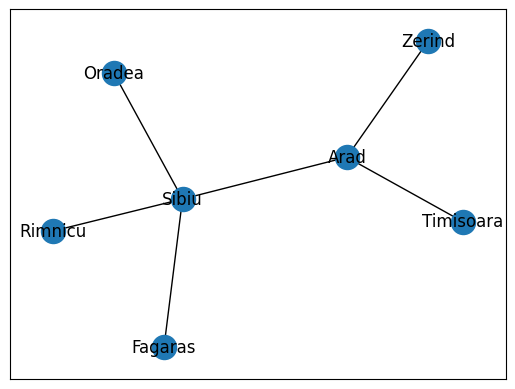

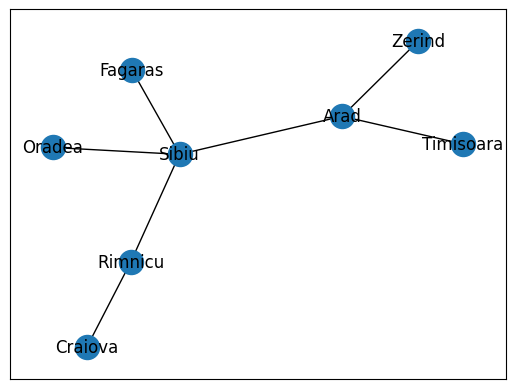

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447, 'Oradea': 671, 'Fagaras': 417, 'Rimnicu': 413, 'Craiova': 526}


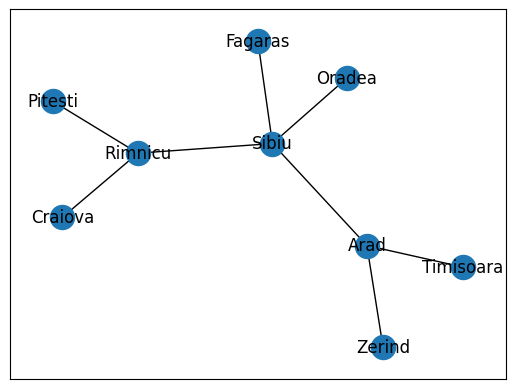

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447, 'Oradea': 671, 'Fagaras': 417, 'Rimnicu': 413, 'Craiova': 526, 'Pitesti': 415}
Origem:  Pitesti  Destino:  Bucharest  Caminho:  ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti']


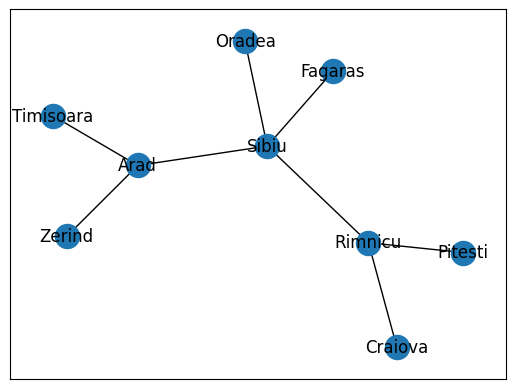

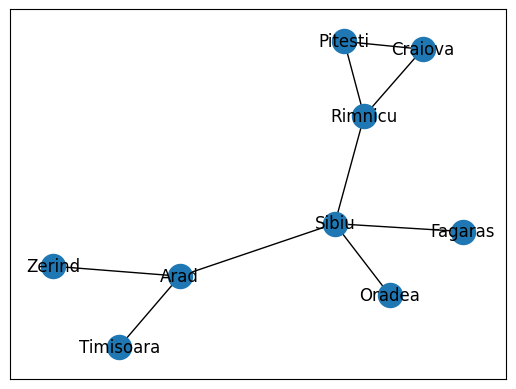

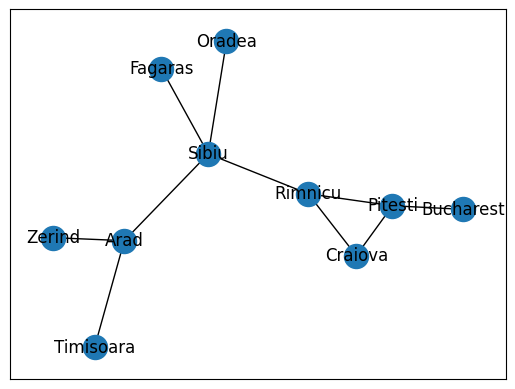

{'Arad': 366, 'Sibiu': 393, 'Zerind': 449, 'Timisoara': 447, 'Oradea': 671, 'Fagaras': 417, 'Rimnicu': 413, 'Craiova': 526, 'Pitesti': 415, 'Bucharest': 418}
Origem:  Fagaras  Destino:  Bucharest  Caminho:  ['Arad', 'Sibiu', 'Fagaras']


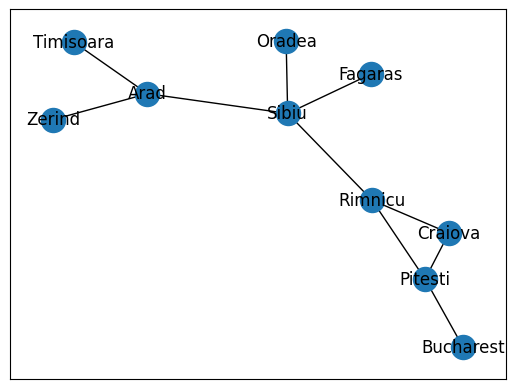

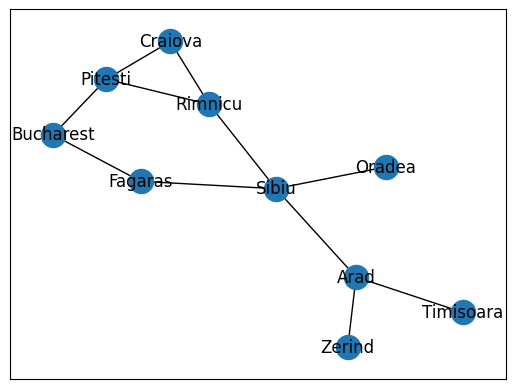

Origem:  Bucharest  Destino:  Bucharest  Caminho:  ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
418


In [6]:
print('\nA Estrela:')
G = GraphVisualization()
heuristic, cost, optimal_path = a_star('Arad', 'Bucharest', G)
print(optimal_path)
print(heuristic)
#G.visualize()

In [ ]:
from queue import PriorityQueue
customers = PriorityQueue() #we initialise the PQ class instead of using a function to operate upon a list. 
customers.put((366, 0, 'Arad', ['Arad']))
customers.put((393, 140, 'Sibiu', ['Arad', 'Sibiu']))
customers.put((449, 75, 'Zerind', ['Arad', 'Zerind']))
customers.put((447, 118, 'Timisoara', ['Arad', 'Timisoara']))
customers.put((671, 291, 'Oradea', ['Arad', 'Sibiu', 'Oradea']))
customers.put((415, 239, 'Fagaras', ['Arad', 'Sibiu', 'Fagaras']))
customers.put((413, 220, 'Rimnicu', ['Arad', 'Sibiu', 'Rimnicu']))
customers.put((526, 366, 'Craiova', ['Arad', 'Sibiu', 'Rimnicu', 'Craiova']))
customers.put((417, 317, 'Pitesti', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti']))
customers.put((450, 450, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']))
while not customers.empty():
     print(customers.get())


(366, 0, 'Arad', ['Arad'])
(393, 140, 'Sibiu', ['Arad', 'Sibiu'])
(413, 220, 'Rimnicu', ['Arad', 'Sibiu', 'Rimnicu'])
(415, 239, 'Fagaras', ['Arad', 'Sibiu', 'Fagaras'])
(417, 317, 'Pitesti', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti'])
(447, 118, 'Timisoara', ['Arad', 'Timisoara'])
(449, 75, 'Zerind', ['Arad', 'Zerind'])
(450, 450, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'])
(526, 366, 'Craiova', ['Arad', 'Sibiu', 'Rimnicu', 'Craiova'])
(671, 291, 'Oradea', ['Arad', 'Sibiu', 'Oradea'])
